# KNN Classification Project

## From Pierian Data's Python for Data Science and Machine Learning Boot Camp

Determine a classification model from anonymized data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load and inspect dataset

In [2]:
data = pd.read_csv('./data/KNN_Project_Data')

In [3]:
data.head(5)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


All columns are numerical and there are no missing values.

## Brief data exploration

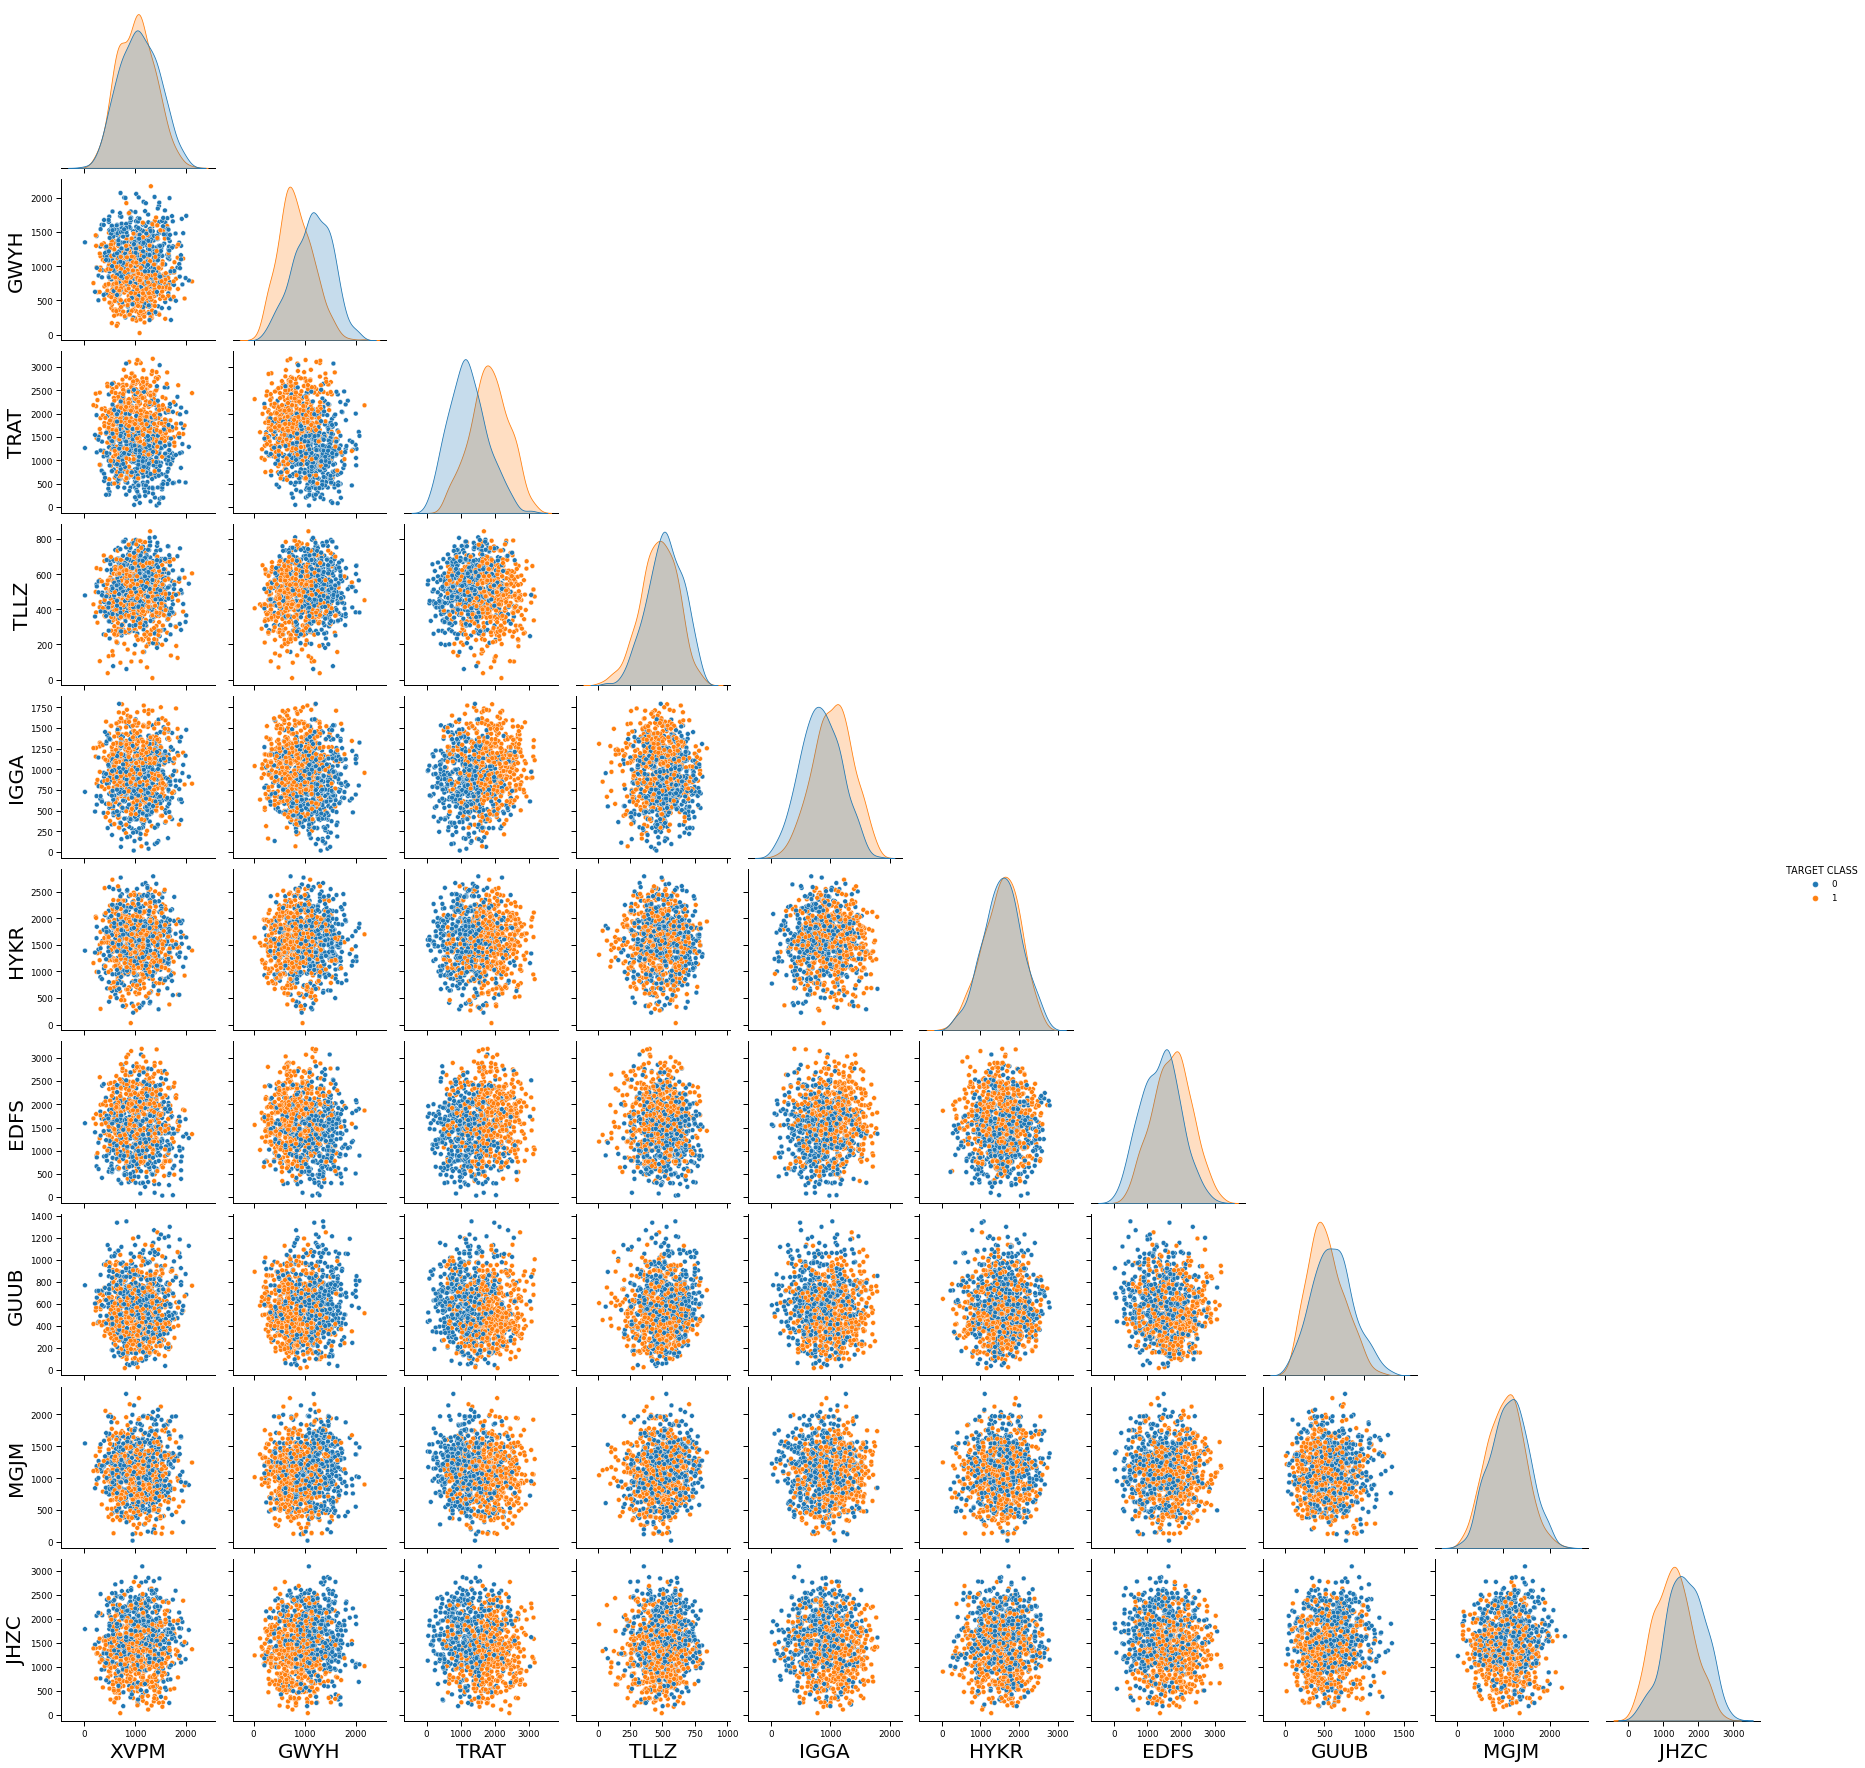

In [96]:
sns.set_context("paper", rc={"axes.labelsize":20})
sns.pairplot(data=data, hue='TARGET CLASS', corner=True)

<AxesSubplot:xlabel='TARGET CLASS', ylabel='count'>

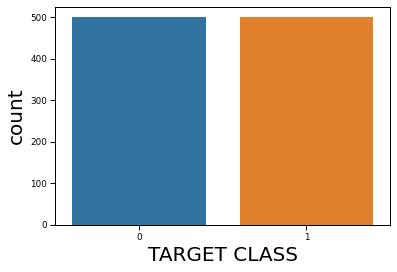

In [98]:
sns.countplot(data=data, x='TARGET CLASS')

All variables are continuous and there is clustering of the target class visible in many pairplots. Given these facts and that there are only 10 features, KNN is an applicable candidate model.

The two classifications for the TARGET CLASS have equal number of counts, so model performance metrics like precision will be meaningful.

## Fit KNN model

Scale model features to use with KNN algorithm:

In [8]:
from sklearn.preprocessing import StandardScaler

In [101]:
scalar = StandardScaler()
scalar.fit(data.drop('TARGET CLASS', axis=1))
X_scaled = scalar.transform(data.drop('TARGET CLASS', axis=1)) # Scaled model features.
print(X_scaled[0:5, :]) # Quick verification of rescaling.

[[ 1.56852168 -0.44343461  1.61980773 -0.9582548  -1.12848137  0.13833575
   0.98049313 -0.93279392  1.00831307 -1.06962723]
 [-0.11237594 -1.05657361  1.7419175  -1.50422015  0.64000936  1.08155221
  -1.18266332 -0.46186435  0.25832069 -1.04154625]
 [ 0.66064691 -0.43698145  0.77579285  0.21339413 -0.0531708   2.03087225
  -1.24070739  1.14929806  2.1847836   0.34281129]
 [ 0.01153303  0.19132405 -1.43347252 -0.10005318 -1.50722308 -1.75363188
  -1.18356113 -0.88855689  0.16230961 -0.00279348]
 [-0.09905922  0.82081532 -0.90434645  1.60901484 -0.28206546 -0.36509894
  -1.09564397  0.39141925 -1.3656025   0.78776233]]


Split data set into training and test data:

In [68]:
from sklearn.model_selection import train_test_split

In [107]:
y = data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=34)

First run with k=1 to verify model successfully fits to the data:

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Next, fit KNN model for a range of k to determine optimal value of k:

In [109]:
error_rate = [] # Store error rates (%) for all runs here.

k = range(1, 60)
for ki in k:
    knn = KNeighborsClassifier(n_neighbors=ki)
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test) # model predictions.
    error_rate.append(100*np.sum(y_test != y_pred_i)/len(y_test))

Text(0, 0.5, 'Model error rate')

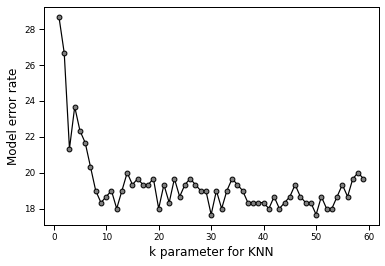

In [110]:
# plot error rate as a function of k:
plt.figure()
plt.plot(k, error_rate, color='black', marker='o', markerfacecolor='grey')
plt.xlabel("k parameter for KNN", fontsize=12)
plt.ylabel("Model error rate", fontsize=12)

**The KNN model plateaus to around a 19% +/-1% error rate for k=8 and higher. k=10 is a good choice for the model.**

## KNN model dropping some features

The PDFs for the two TARGET CLASS classifications show minimal, if any, splitting for the 'HYKR' and 'MGJM' features. Try removing these features and testing model performance.

In [111]:
# Scale remaining features and get training/test data 
#(should be same rows as previously since random_state is the same):
scalar.fit(data.drop(['TARGET CLASS','HYKR','MGJM'], axis=1))
X_scaled2 = scalar.transform(data.drop(['TARGET CLASS','HYKR','MGJM'], axis=1))
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y, test_size=0.3, random_state=34)

In [112]:
# Fit model for range of k
error_rate = [] # Store error rates (%) for all runs here.

k = range(1, 60)
for ki in k:
    knn = KNeighborsClassifier(n_neighbors=ki)
    knn.fit(X_train2, y_train2)
    y_pred_i = knn.predict(X_test2) # model predictions.
    error_rate.append(100*np.sum(y_test2 != y_pred_i)/len(y_test2))

Text(0, 0.5, 'Model error rate')

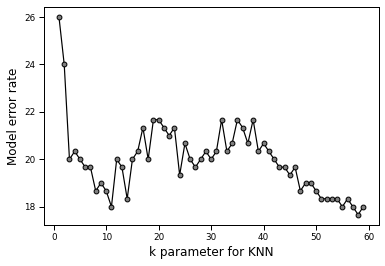

In [113]:
# plot error rate as a function of k:
plt.figure()
plt.plot(k, error_rate, color='black', marker='o', markerfacecolor='grey')
plt.xlabel("k parameter for KNN", fontsize=12)
plt.ylabel("Model error rate", fontsize=12)

For k ~ 10, the error rate is the same as for the model with all features included, ~18-19%. For 10<k<40 there is an error rate increase of ~2%. Therefore, including these features results in only a small increase of the model's performance.

## Model performance assessment

Rerun model with all features and for k=10:

In [114]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Classification report and confusion matrix for model with all features:

In [115]:
from sklearn.metrics import classification_report, confusion_matrix

In [116]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[133  22]
 [ 34 111]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       155
           1       0.83      0.77      0.80       145

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



Classification report and confusion matrix for model without 'HYKR' and 'MGJM' features:

In [117]:
knn.fit(X_train2, y_train2)
y_pred2 = knn.predict(X_test2)
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[136  19]
 [ 37 108]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       155
           1       0.85      0.74      0.79       145

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300



**Assessment and final remarks:**

Precision and f1-scores are around 80% for both classes, so the model has fair predictive power. Misclassifications are not heavily weighted toward type 1 or 2 errors.

The 'HYKR' and 'MGJM' features increase the model's performance by 2% or less (as assessed by error rate and the classification report), depending on the choice of k. 